In [3]:
pip install pandas numpy matplotlib yfinance scipy


Note: you may need to restart the kernel to use updated packages.


In [4]:
tickers = ['TSLA', 'NVDA', 'APLD', 'PLTR', 'AAPL', 'LCID', 'F', 'INTC', 'HOOD', 'SOFI']


In [8]:
# Extract only the 'Close' prices
close_prices = data['Close']

# Now you can compute returns
returns = close_prices.pct_change().dropna()


In [9]:
print(close_prices.head())
print(returns.head())


Ticker           AAPL  APLD         F  HOOD       INTC  LCID      NVDA  PLTR  \
Date                                                                           
2020-01-02  72.620834   NaN  7.204662   NaN  53.666466   NaN  5.972161   NaN   
2020-01-03  71.914810   NaN  7.044050   NaN  53.013721   NaN  5.876571   NaN   
2020-01-06  72.487839   NaN  7.005807   NaN  52.863762   NaN  5.901215   NaN   
2020-01-07  72.146957   NaN  7.074643   NaN  51.981663   NaN  5.972659   NaN   
2020-01-08  73.307510   NaN  7.074643   NaN  52.016956   NaN  5.983861   NaN   

Ticker      SOFI       TSLA  
Date                         
2020-01-02   NaN  28.684000  
2020-01-03   NaN  29.534000  
2020-01-06   NaN  30.102667  
2020-01-07   NaN  31.270666  
2020-01-08   NaN  32.809334  
Ticker          AAPL      APLD         F      HOOD      INTC      LCID  \
Date                                                                     
2022-04-14 -0.029988 -0.014433 -0.001934 -0.042893 -0.028505 -0.047165   
2022-04

In [10]:
import numpy as np

mean_returns = returns.mean() * 252  # 252 trading days per year
cov_matrix = returns.cov() * 252


In [11]:
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_stddev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio


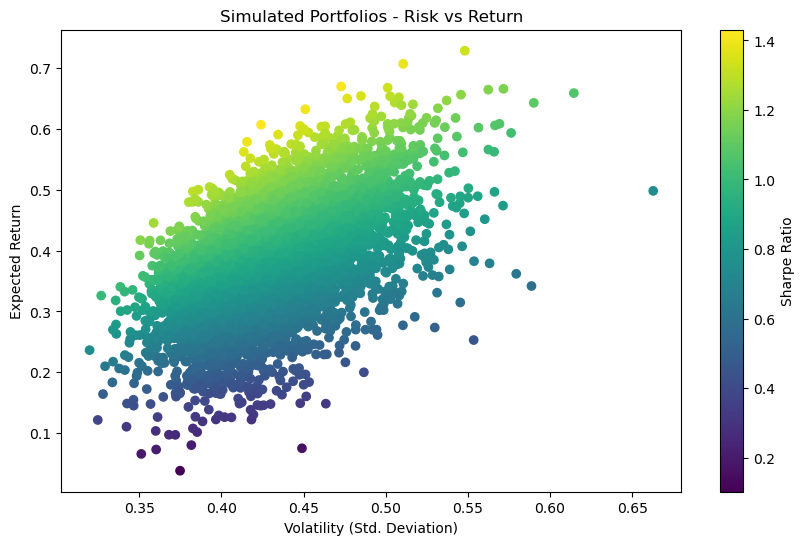

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.title('Simulated Portfolios - Risk vs Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


In [13]:
from scipy.optimize import minimize

def neg_sharpe(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -port_return / port_volatility  # Negative Sharpe Ratio


In [14]:
num_assets = len(tickers)
initial_weights = num_assets * [1. / num_assets]
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights must sum to 1


In [15]:
opt_result = minimize(
    neg_sharpe,
    initial_weights,
    args=(mean_returns, cov_matrix),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
optimal_weights = opt_result.x


In [16]:
optimal_portfolio = pd.DataFrame({
    'Ticker': tickers,
    'Optimal Weight': np.round(optimal_weights, 4)
})
print(optimal_portfolio)


  Ticker  Optimal Weight
0   TSLA          0.0000
1   NVDA          0.0635
2   APLD          0.0000
3   PLTR          0.0988
4   AAPL          0.0000
5   LCID          0.0000
6      F          0.5692
7   INTC          0.2686
8   HOOD          0.0000
9   SOFI          0.0000


In [17]:
optimal_portfolio.to_csv("optimal_portfolio.csv", index=False)
